### Compare posterior param range distribution to prior

The purpose of this script is to see if the aprior param ranges should be updated in the LHS to increase sampling density in the range of param values that result in success.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import re

In [2]:
PEAS_members = pd.read_csv('/home/adamhb/gdrive/postdoc/simulation_output/passsing_CZ2_equilibrium_110323_and_110523_with_fire.csv')
param_ranges = pd.read_csv('/home/adamhb/gdrive/postdoc/california-fates/parameter_ranges/param_range_archive/param_ranges_100223.csv')            

In [3]:
PEAS_members = PEAS_members.loc[PEAS_members['inst'].isin([2, 8, 14, 15, 22, 24, 25, 26, 30, 33, 46, 48, 50, 51, 52])]

In [4]:
list(PEAS_members['fates_fire_nignitions_0'].reset_index()['index'] - 1)

[2, 4, 7, 19, 30, 43, 44, 49, 51]

In [5]:
list(PEAS_members['fates_fire_nignitions_0'])

[2.50288919296338,
 0.136548100249566,
 0.711298623200441,
 0.835443985502639,
 0.262196914182938,
 0.428518562275885,
 1.43964184982846,
 1.54531759296711,
 0.757860616193905]

In [6]:
list(param_ranges['param'].unique())

['fates_recruit_seed_alloc_mature',
 'fates_recruit_seed_dbh_repro_threshold',
 'fates_fire_alpha_SH',
 'fates_fire_bark_scaler',
 'fates_fire_crown_kill',
 'fates_fire_drying_ratio',
 'fates_fire_nignitions',
 'fates_fire_threshold',
 'fates_mort_bmort',
 'fates_leaf_slatop',
 'fates_leaf_slamax',
 'fates_leaf_vcmax25top',
 'fates_mort_scalar_cstarvation',
 'fates_fire_frac_resprout',
 'fates_frag_seed_decay_rate',
 'fates_recruit_seed_germination_rate',
 'fates_disturbance_germ',
 'fates_turnover_branch',
 'fates_turnover_leaf',
 'fates_nonhydro_smpsc',
 'fates_mort_hf_sm_threshold',
 'fates_recruit_inter_patch_disp_frac',
 'fates_frag_maxdecomp',
 'fates_alloc_storage_cushion',
 'fates_grperc',
 'fates_stoich_nitr',
 'fates_mort_ip_size_senescence',
 'fates_mort_ip_age_senescence',
 'fates_allom_d2ca_coefficient_max',
 'fates_allom_d2ca_coefficient_min',
 'fates_allom_agb1']

In [7]:
param_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pft_ineq           101 non-null    object 
 1   param              101 non-null    object 
 2   pft                101 non-null    int64  
 3   organ              9 non-null      float64
 4   value_min          92 non-null     float64
 5   value_max          95 non-null     float64
 6   apriori_value      66 non-null     object 
 7   source_min         91 non-null     object 
 8   source_max         88 non-null     object 
 9   source_apriori     55 non-null     object 
 10  comments           27 non-null     object 
 11  link               5 non-null      object 
 12  additional_values  0 non-null      float64
dtypes: float64(4), int64(1), object(8)
memory usage: 10.4+ KB


In [8]:


def split_string_before_integer(s):
    # This pattern looks for an underscore that is immediately followed by one or more digits
    # and splits the string at this underscore.
    pattern = r'_(?=\d+)'
    return re.split(pattern, s)
    
def HistModelObs(PEAS_members,param_ranges,var):
    '''
    Returns a histogram comparing the model data to a range

    Inputs:
    - modData: dataframe of model metrics
    - Obs: dictionary of observations from the literature. Each list is a range of a particular observation
    - Var: variable name to plot

    Output:
    - histogram
    '''

    var_name = split_string_before_integer(var)[0]
    print(var_name)
    
    pft = split_string_before_integer(var)[1]
    #print(pft)
    # Get min and max ranges
    param_filter = param_ranges['param'] == var_name
    #print(sum(param_filter))
    
    pft_filter = param_ranges['pft'] == int(pft)
    #print(sum(pft_filter))
    param_data = param_ranges.loc[param_filter & pft_filter]
    #print(param_data)
    
    
    min_val = list(param_data['value_min'])[0]
    max_val = list(param_data['value_max'])[0]

    var_data = PEAS_members[var]
    
    n, bins, patches = plt.hist(var_data, bins=15, alpha=0.9, color='white', edgecolor='black', label = "Param")
    line1 = plt.axvline(x=min_val, color='black', linestyle='--', linewidth=2, label = "Obs. range")
    line2 = plt.axvline(x=max_val, color='black', linestyle='--', linewidth=2)
    
    plt.ylabel("Number of ensemble members")
    plt.legend()
    plt.title(var)
    plt.tight_layout()
    plt.show()

In [23]:
vars = ['fates_fire_alpha_SH_1','fates_fire_alpha_SH_2','fates_allom_d2ca_coefficient_max_5','fates_leaf_vcmax25top_5',
        'fates_mort_hf_sm_threshold_0','fates_fire_nignitions_0','fates_fire_threshold_0','fates_fire_frac_resprout_4',
        'fates_fire_frac_resprout_5','fates_disturbance_germ_4','fates_recruit_seed_germination_rate_4',
        'fates_mort_bmort_1']

vars = ['fates_mort_scalar_cstarvation_2']

fates_mort_scalar_cstarvation


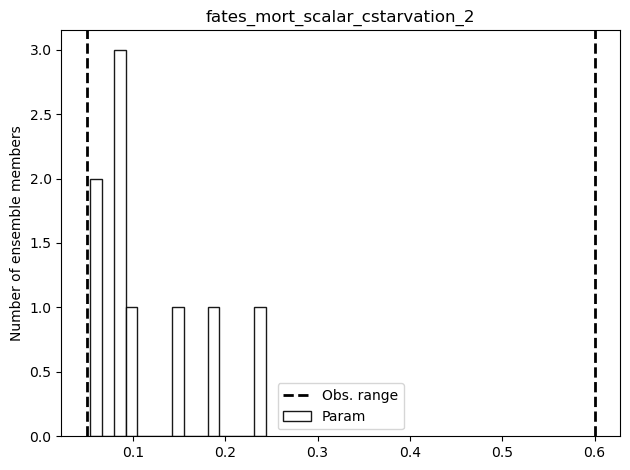

In [24]:
for var in vars:
    HistModelObs(PEAS_members,param_ranges,var)